In [3]:
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import (RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor,
RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, AdaBoostClassifier)
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor  
from sklearn.model_selection import train_test_split, KFold, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import randint
import numpy as np
from sklearn.feature_selection import SelectFromModel
import statsmodels.api as sm
from sklearn.feature_selection import SelectKBest, f_regression
from lightgbm import LGBMRegressor
from sklearn.preprocessing import StandardScaler

## Basic Data Cleaning and Combining

In [4]:
# Reading Data
margin_df = pd.read_csv("TP_margin_data.csv")
demo_df = pd.read_csv("demog_pmm_data.csv") 
churn_df = pd.read_csv('TP_churn_data.csv')

In [5]:
margin_df.head(10)

,trans_amt_t_minus_00,trans_amt_t_minus_01,trans_amt_t_minus_02,trans_amt_t_minus_03,trans_amt_t_minus_04,trans_amt_t_minus_05,trans_amt_t_minus_06,trans_amt_t_minus_07,trans_amt_t_minus_08,trans_amt_t_minus_09,...,cost_amt_t_plus_04,cost_amt_t_plus_05,cost_amt_t_plus_06,cost_amt_t_plus_07,cost_amt_t_plus_08,cost_amt_t_plus_09,cost_amt_t_plus_10,cost_amt_t_plus_11,cost_amt_t_plus_12,acct_ID
0,0.0,0.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.30,0.82,0.30,0.82,0.00,0.56,0.00,1.09,0.56,I148760611
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,0.0,...,0.26,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,I151076142
2,25.0,0.0,0.0,50.0,30.0,0.0,60.0,30.0,0.0,140.0,...,1.37,0.82,1.07,1.59,1.07,1.93,3.41,1.59,1.93,I27001315
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,84.0,84.0,...,0.00,0.00,0.30,0.00,0.00,0.00,0.00,0.00,0.30,I150064127
4,20.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.37,0.82,0.60,1.42,0.00,0.56,0.56,2.60,0.86,I152631565
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.52,0.30,0.52,0.00,0.26,0.00,0.79,0.56,H62972005
6,0.0,0.0,0.0,0.0,20.0,20.0,20.0,20.0,20.0,20.0,...,0.56,0.00,0.00,0.00,0.00,0.00,0.00,0.30,0.30,I151044258
7,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,...,1.89,2.32,1.20,4.24,1.20,2.16,3.88,2.89,2.36,I95584028
8,20.0,20.0,20.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.15,2.36,1.50,4.24,1.20,1.86,3.88,2.89,2.96,I106802847
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,I149698399


In [6]:
churn_df.head(10)

,ST,Zip,DMA,Area_Cd,emailable,solicit_ph_ind,solicit_email_ind,fixd_incm_flg,scheduled_purchase_flg,months_since_last_trans,...,resp_cnt_36mo,call_in_mo_36mo,call_out_mo_36mo,order_cnt_36mo,tier,tier_prev,acct_ID,activation_date,event_date,churn_year_plus1_ind
0,SC,29607,567,864,1,1,1,0,0,3,...,0,0,1,1,1-Bronze,xxx,I148760611,30NOV12,31MAY15,1
1,MO,63901,632,573,1,1,1,0,0,9,...,0,1,0,1,1-Bronze,xxx,I151076142,29NOV13,29NOV14,1
2,IL,60456,602,missing,0,1,1,0,0,1,...,2,0,0,4,1-Bronze,xxx,I27001315,05OCT00,NaN,0
3,FL,34698,539,727,1,1,1,0,0,9,...,0,1,1,3,3-Gold,xxx,I150064127,31JUL13,29NOV14,1
4,CA,92084,825,760,0,1,1,0,0,1,...,0,0,0,2,1-Bronze,xxx,I152631565,30JUN14,NaN,0
5,MI,48446,505,810,1,0,1,0,0,11,...,1,0,3,5,1-Bronze,2-Silver,H62972005,04JAN04,30SEP14,1
6,AL,35020,630,205,0,1,1,0,0,5,...,0,0,0,1,1-Bronze,xxx,I151044258,30OCT13,31MAR15,1
7,PR,missing,998,missing,0,1,1,0,1,1,...,0,0,0,2,1-Bronze,xxx,I95584028,04AUG04,NaN,0
8,AZ,85232,753,520,1,1,1,0,1,1,...,0,0,0,2,3-Gold,1-Bronze,I106802847,03SEP04,NaN,0
9,CA,95691,862,916,1,1,1,0,0,12,...,0,1,2,2,1-Bronze,xxx,I149698399,31MAY13,30AUG14,1


In [7]:
demo_df.head(10)

,demog_assets,demog_LOR,demog_ownrent,demog_age,demog_span,demog_inc_fine,demog_inc_crs,demog_generations,demog_homevalue,demog_adults,acct_ID
0,IPA <= 25000,4th Year,Definite Renter,35-44 years old,1,$ 20000 - $ 29999,$ 15000 - $ 29999,2,Less than $50000,2,I148760611
1,IPA <= 25000,13 - 18 Months,Definite Owner (any type dwelling unit),35-44 years old,0,$ 20000 - $ 29999,Less than $15000,1,$ 50000 - $ 99999,1,I151076142
2,IPA <= 25000,11th Year,Definite Owner (any type dwelling unit),55-64 years old,0,Less than $15000,Less than $15000,1,Less than $50000,1,I27001315
3,250000 < IPA <= 500000,3rd Year,Definite Owner (any type dwelling unit),55-64 years old,0,$ 50000 - $ 74999,$ 50000 - $ 74999,1,$150000 - $199999,1,I150064127
4,250000 < IPA <= 500000,9th Year,Definite Owner (any type dwelling unit),45-54 years old,0,$ 100000 - $124999,$ 100000 - $149999,2,$350000 - $399999,3,I152631565
5,IPA <= 25000,12th Year,Definite Owner (any type dwelling unit),65-74 years old,0,$ 30000 - $ 39999,$ 30000 - $ 39999,3,$300000 - $349999,3,H62972005
6,IPA <= 25000,19th Year,Definite Owner (any type dwelling unit),55-64 years old,0,Less than $15000,Less than $15000,1,Less than $50000,2,I151044258
7,IPA <= 25000,10th Year,Probable Owner (any type dwelling unit),65-74 years old,0,Less than $15000,Less than $15000,2,Less than $50000,2,I95584028
8,100000 < IPA <= 250000,17th Year,Definite Owner (any type dwelling unit),45-54 years old,0,$ 75000 - $ 99999,$ 75000 - $ 99999,3,$ 50000 - $ 99999,3,I106802847
9,IPA <= 25000,20 or more Years,Definite Owner (any type dwelling unit),35-44 years old,0,$ 75000 - $ 99999,$ 100000 - $149999,1,$100000 - $149999,2,I149698399


In [8]:
margin_df.describe().T

,count,mean,std,min,25%,50%,75%,max
trans_amt_t_minus_00,240368.0,37.501978,456.731401,0.0,0.00,20.00,40.00,200000.00
trans_amt_t_minus_01,240368.0,41.950652,467.858835,0.0,0.00,20.00,40.00,175000.00
trans_amt_t_minus_02,240368.0,41.038183,879.318725,0.0,0.00,20.00,30.00,307992.62
trans_amt_t_minus_03,240368.0,33.519849,201.652307,0.0,0.00,20.00,35.00,57600.00
trans_amt_t_minus_04,240368.0,35.888688,178.737354,0.0,0.00,20.00,40.00,25000.00
...,...,...,...,...,...,...,...,...
cost_amt_t_plus_08,240368.0,2.132197,6.676597,0.0,0.00,0.60,1.20,335.19
cost_amt_t_plus_09,240368.0,2.716945,6.782105,0.0,0.30,1.33,2.23,339.82
cost_amt_t_plus_10,240368.0,3.702092,7.354860,0.0,0.30,2.38,4.14,384.79
cost_amt_t_plus_11,240368.0,3.120577,7.049051,0.0,0.52,1.59,2.92,589.82


In [9]:
## Creating Margin Model Features for Annual Margins
margin_df['rev_Y_neg_1']=margin_df['trans_amt_t_minus_00']+margin_df['trans_amt_t_minus_01']+margin_df['trans_amt_t_minus_02']+margin_df['trans_amt_t_minus_03']+margin_df['trans_amt_t_minus_04']+margin_df['trans_amt_t_minus_05']+margin_df['trans_amt_t_minus_06']+margin_df['trans_amt_t_minus_07']+margin_df['trans_amt_t_minus_08']+margin_df['trans_amt_t_minus_09']+margin_df['trans_amt_t_minus_10']+margin_df['trans_amt_t_minus_11']
margin_df['cost_Y_neg_1']=margin_df['cost_amt_t_minus_00']+margin_df['cost_amt_t_minus_01']+margin_df['cost_amt_t_minus_02']+margin_df['cost_amt_t_minus_03']+margin_df['cost_amt_t_minus_04']+margin_df['cost_amt_t_minus_05']+margin_df['cost_amt_t_minus_06']+margin_df['cost_amt_t_minus_07']+margin_df['cost_amt_t_minus_08']+margin_df['cost_amt_t_minus_09']+margin_df['cost_amt_t_minus_10']+margin_df['cost_amt_t_minus_11']
margin_df['margin_Y_neg_1']=margin_df['rev_Y_neg_1']-margin_df['cost_Y_neg_1']

margin_df['rev_Y_neg_2']=margin_df['trans_amt_t_minus_12']+margin_df['trans_amt_t_minus_13']+margin_df['trans_amt_t_minus_14']+margin_df['trans_amt_t_minus_15']+margin_df['trans_amt_t_minus_16']+margin_df['trans_amt_t_minus_17']+margin_df['trans_amt_t_minus_18']+margin_df['trans_amt_t_minus_19']+margin_df['trans_amt_t_minus_20']+margin_df['trans_amt_t_minus_21']+margin_df['trans_amt_t_minus_22']+margin_df['trans_amt_t_minus_23']
margin_df['cost_Y_neg_2']=margin_df['cost_amt_t_minus_12']+margin_df['cost_amt_t_minus_13']+margin_df['cost_amt_t_minus_14']+margin_df['cost_amt_t_minus_15']+margin_df['cost_amt_t_minus_16']+margin_df['cost_amt_t_minus_17']+margin_df['cost_amt_t_minus_18']+margin_df['cost_amt_t_minus_19']+margin_df['cost_amt_t_minus_20']+margin_df['cost_amt_t_minus_21']+margin_df['cost_amt_t_minus_22']+margin_df['cost_amt_t_minus_23']
margin_df['margin_Y_neg_2']=margin_df['rev_Y_neg_2']-margin_df['cost_Y_neg_2']

margin_df['rev_Y_neg_3']=margin_df['trans_amt_t_minus_24']+margin_df['trans_amt_t_minus_25']+margin_df['trans_amt_t_minus_26']+margin_df['trans_amt_t_minus_27']+margin_df['trans_amt_t_minus_28']+margin_df['trans_amt_t_minus_29']+margin_df['trans_amt_t_minus_30']+margin_df['trans_amt_t_minus_31']+margin_df['trans_amt_t_minus_32']+margin_df['trans_amt_t_minus_33']+margin_df['trans_amt_t_minus_34']+margin_df['trans_amt_t_minus_35']
margin_df['cost_Y_neg_3']=margin_df['cost_amt_t_minus_24']+margin_df['cost_amt_t_minus_25']+margin_df['cost_amt_t_minus_26']+margin_df['cost_amt_t_minus_27']+margin_df['cost_amt_t_minus_28']+margin_df['cost_amt_t_minus_29']+margin_df['cost_amt_t_minus_30']+margin_df['cost_amt_t_minus_31']+margin_df['cost_amt_t_minus_32']+margin_df['cost_amt_t_minus_33']+margin_df['cost_amt_t_minus_34']+margin_df['cost_amt_t_minus_35']
margin_df['margin_Y_neg_3']=margin_df['rev_Y_neg_3']-margin_df['cost_Y_neg_3']

margin_df['rev_Y_pos_1']=margin_df['trans_amt_t_plus_01']+margin_df['trans_amt_t_plus_02']+margin_df['trans_amt_t_plus_03']+margin_df['trans_amt_t_plus_04']+margin_df['trans_amt_t_plus_05']+margin_df['trans_amt_t_plus_06']+margin_df['trans_amt_t_plus_07']+margin_df['trans_amt_t_plus_08']+margin_df['trans_amt_t_plus_09']+margin_df['trans_amt_t_plus_10']+margin_df['trans_amt_t_plus_11']+margin_df['trans_amt_t_plus_12']
margin_df['cost_Y_pos_1']=margin_df['cost_amt_t_plus_01']+margin_df['cost_amt_t_plus_02']+margin_df['cost_amt_t_plus_03']+margin_df['cost_amt_t_plus_04']+margin_df['cost_amt_t_plus_05']+margin_df['cost_amt_t_plus_06']+margin_df['cost_amt_t_plus_07']+margin_df['cost_amt_t_plus_08']+margin_df['cost_amt_t_plus_09']+margin_df['cost_amt_t_plus_10']+margin_df['cost_amt_t_plus_11']+margin_df['cost_amt_t_plus_12']
margin_df['margin_Y_pos_1']=margin_df['rev_Y_pos_1']-margin_df['cost_Y_pos_1']

margin_df = margin_df[['acct_ID','margin_Y_neg_1','margin_Y_neg_2','margin_Y_neg_3','margin_Y_pos_1']]

print(" summary stats on margin data ") 
print(margin_df.describe(include='all').transpose())

 summary stats on margin data 
                   count  unique         top freq        mean          std  \
acct_ID           240368  239356  I152065826    3         NaN          NaN   
margin_Y_neg_1  240368.0     NaN         NaN  NaN  221.160207  1529.891172   
margin_Y_neg_2  240368.0     NaN         NaN  NaN  188.612409  1921.481227   
margin_Y_neg_3  240368.0     NaN         NaN  NaN   165.35382  2129.313273   
margin_Y_pos_1  240368.0     NaN         NaN  NaN   353.59658  2056.654404   

                     min   25%      50%       75%        max  
acct_ID              NaN   NaN      NaN       NaN        NaN  
margin_Y_neg_1 -15084.25  42.2  181.915    337.05  284605.19  
margin_Y_neg_2 -21224.13   0.0   125.45  294.4525  469878.25  
margin_Y_neg_3  -7515.94   0.0   28.255     245.4  493368.29  
margin_Y_pos_1  -3509.67 -2.21  159.395  332.0025  399818.38  


In [10]:
#margin_df['margin_Y_pos_1'].hist(bins=40)

In [11]:
# Churn Data Preprocessing
""" when avg interval = -1 replace with 36 months """
churn_df['purch_avg_interval'].replace([-1], 36, inplace=True)

""" when avg purchase = -1 replace with 0 """
churn_df['purch_avg_36mo'].replace([-1], 0, inplace=True)

churn_df['log_order_cnt_36mo']=np.log10(churn_df['order_cnt_36mo']+1)
churn_df['log_purch_amt_36mo']=np.log10(churn_df['purch_amt_36mo']+1)
churn_df['log_purch_amt_life']=np.log10(churn_df['purch_amt_life']+1)
churn_df['log_purch_avg_36mo']=np.log10(churn_df['purch_avg_36mo']+1)
churn_df['log_purch_cnt_life']=np.log10(churn_df['purch_cnt_life']+1)
churn_df['log_purch_cnt_tt_36mo']=np.log10(churn_df['purch_cnt_tt_36mo']+1)
churn_df['log_resp_cnt_36mo']=np.log10(churn_df['resp_cnt_36mo']+1)

churn_df['perc_purch_cc_36mo']=np.where(churn_df['purch_cnt_tt_36mo']==0,0,churn_df['purch_cnt_cc_36mo']/churn_df['purch_cnt_tt_36mo'])
churn_df['perc_purch_ck_36mo']=np.where(churn_df['purch_cnt_tt_36mo']==0,0,churn_df['purch_cnt_ck_36mo']/churn_df['purch_cnt_tt_36mo'])
churn_df['perc_purch_et_36mo']=np.where(churn_df['purch_cnt_tt_36mo']==0,0,churn_df['purch_cnt_et_36mo']/churn_df['purch_cnt_tt_36mo'])

churn_df = churn_df.drop(['order_cnt_36mo','purch_amt_36mo','purch_amt_life','purch_avg_36mo','purch_cnt_life',
                          'purch_cnt_tt_36mo','resp_cnt_36mo',
                          'purch_cnt_cc_36mo','purch_cnt_ck_36mo','purch_cnt_et_36mo'],axis=1)

print(" summary stats on churn data ") 
print(churn_df.describe(include='all').transpose())

 summary stats on churn data 
                             count  unique         top    freq       mean  \
ST                          240368      61          TX   21633        NaN   
Zip                         240368   26124     missing     894        NaN   
DMA                         240368     216         803    9721        NaN   
Area_Cd                     240368     384     missing   13090        NaN   
emailable                 240368.0     NaN         NaN     NaN   0.514931   
solicit_ph_ind            240368.0     NaN         NaN     NaN   0.892619   
solicit_email_ind         240368.0     NaN         NaN     NaN   0.964118   
fixd_incm_flg             240368.0     NaN         NaN     NaN   0.092296   
scheduled_purchase_flg    240368.0     NaN         NaN     NaN   0.259989   
months_since_last_trans   240368.0     NaN         NaN     NaN   2.915554   
months_since_first_trans  240368.0     NaN         NaN     NaN  65.444868   
purch_avg_interval        240368.0     NaN    

In [12]:
# Mapping State Column to Different Regions
state_to_region = {
    'WA': 'West', 'OR': 'West', 'CA': 'West', 'AK': 'West', 'HI': 'West',
    'AZ': 'West', 'NV': 'West', 'ID': 'West', 'MT': 'West', 'WY': 'West',
    'UT': 'West', 'CO': 'West', 'NM': 'West',
    'ND': 'Midwest', 'SD': 'Midwest', 'NE': 'Midwest', 'KS': 'Midwest',
    'MN': 'Midwest', 'IA': 'Midwest', 'MO': 'Midwest', 'WI': 'Midwest',
    'IL': 'Midwest', 'MI': 'Midwest', 'IN': 'Midwest', 'OH': 'Midwest',
    'ME': 'Northeast', 'NH': 'Northeast', 'VT': 'Northeast', 'MA': 'Northeast',
    'RI': 'Northeast', 'CT': 'Northeast', 'NY': 'Northeast', 'PA': 'Northeast',
    'NJ': 'Northeast', 'DE': 'Northeast', 'MD': 'Northeast',
    'WV': 'South', 'VA': 'South', 'KY': 'South', 'TN': 'South', 'NC': 'South',
    'SC': 'South', 'GA': 'South', 'FL': 'South', 'AL': 'South', 'MS': 'South',
    'AR': 'South', 'LA': 'South', 'TX': 'South', 'OK': 'South',
}

# Assume 'combined_all' is your DataFrame and 'ST' is the column with state abbreviations
churn_df['Region'] = churn_df['ST'].map(state_to_region).fillna('Others')

In [13]:
churn_df['Region'].value_counts()

South        103754
West          50686
Midwest       46657
Northeast     37674
Others         1597
Name: Region, dtype: int64

## Dropping Duplicates in All Dataframes

In [14]:
churn_df.drop_duplicates(subset=['acct_ID'], keep='first', inplace=True)
churn_df.shape

(239356, 32)

In [15]:
margin_df.drop_duplicates(subset=['acct_ID'], keep='first', inplace=True)
margin_df.shape

(239356, 5)

In [16]:
demo_df.drop_duplicates(subset=['acct_ID'], keep='first', inplace=True)
demo_df.shape

(239356, 11)

In [52]:
## Merge churn data and margin data
combined_all = pd.merge(margin_df, churn_df, how ='inner', on='acct_ID' )
combined_all = pd.merge(combined_all, demo_df, how ='inner', on='acct_ID' )

In [53]:
print("combined df shape:", combined_all.shape)

combined df shape: (239356, 46)


In [54]:
combined_all.columns

Index(['acct_ID', 'margin_Y_neg_1', 'margin_Y_neg_2', 'margin_Y_neg_3',
       'margin_Y_pos_1', 'ST', 'Zip', 'DMA', 'Area_Cd', 'emailable',
       'solicit_ph_ind', 'solicit_email_ind', 'fixd_incm_flg',
       'scheduled_purchase_flg', 'months_since_last_trans',
       'months_since_first_trans', 'purch_avg_interval', 'mail_cnt_36mo',
       'call_in_mo_36mo', 'call_out_mo_36mo', 'tier', 'tier_prev',
       'activation_date', 'event_date', 'churn_year_plus1_ind',
       'log_order_cnt_36mo', 'log_purch_amt_36mo', 'log_purch_amt_life',
       'log_purch_avg_36mo', 'log_purch_cnt_life', 'log_purch_cnt_tt_36mo',
       'log_resp_cnt_36mo', 'perc_purch_cc_36mo', 'perc_purch_ck_36mo',
       'perc_purch_et_36mo', 'Region', 'demog_assets', 'demog_LOR',
       'demog_ownrent', 'demog_age', 'demog_span', 'demog_inc_fine',
       'demog_inc_crs', 'demog_generations', 'demog_homevalue',
       'demog_adults'],
      dtype='object')

In [55]:
# Creating Dummy Variables and Keeping Original Cols
for column in ['Region', 'tier', 'tier_prev']:
    dummies = pd.get_dummies(combined_all[column],prefix=column)
    combined_all[dummies.columns] = dummies

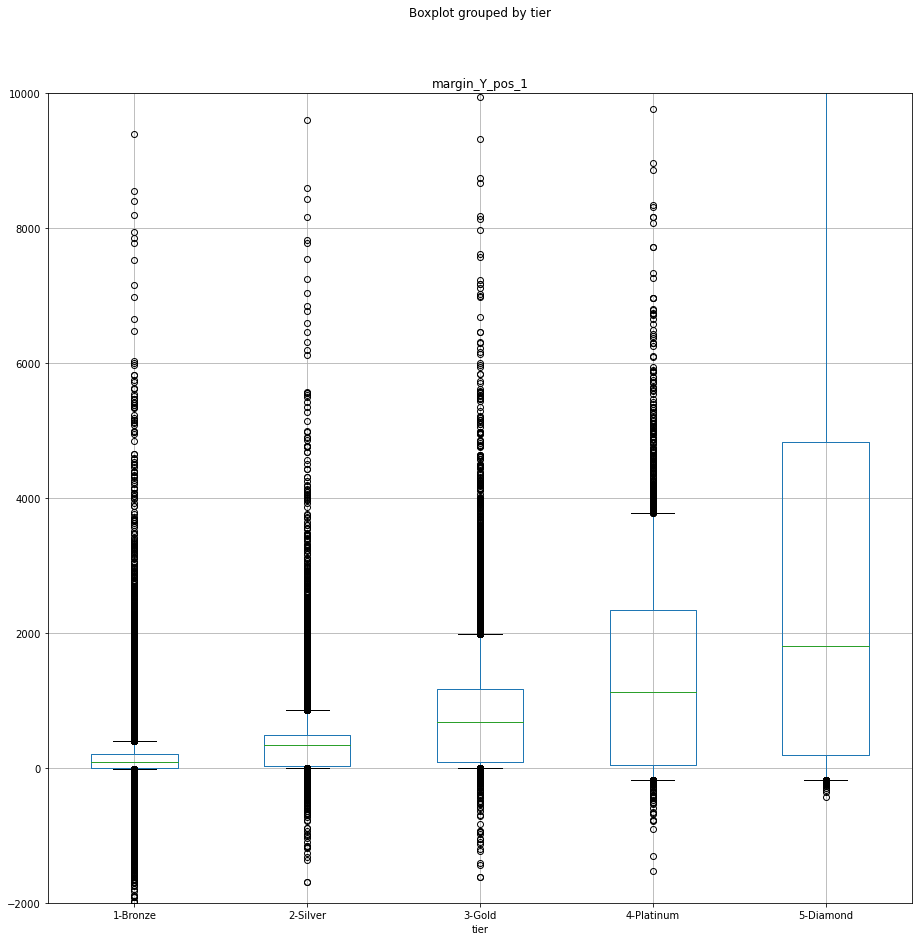

In [56]:
# Boxplot to investigate the distribution of target variable by a categorical variable

axes = combined_all.boxplot(column='margin_Y_pos_1', by='tier',figsize=(15,15),
                   whis=[5,95])
# given the extreme values/range for future margin, limiting the range of the y-axis:
axes.set(ylim=(-2000, 10000))
    
plt.show()

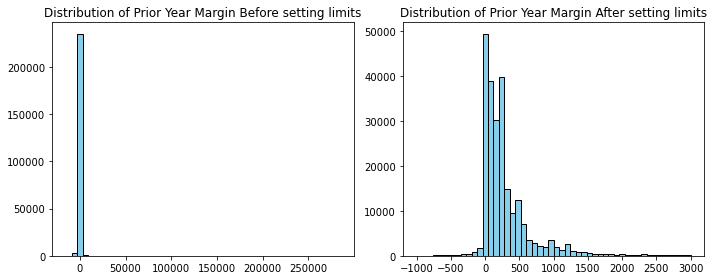

In [57]:
# Visualizing how the distribution of last year of margins look like
temp_df = combined_all.query('-1000<margin_Y_neg_1<3000')

# Create a figure and a 1x2 grid of subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

# Plotting on the first subplot
axs[0].hist(combined_all['margin_Y_neg_1'], bins=50, color='skyblue', edgecolor='black')
axs[0].set_title("Distribution of Prior Year Margin Before setting limits")

# Plotting on the second subplot
axs[1].hist(temp_df['margin_Y_neg_1'], bins=50, color='skyblue', edgecolor='black')
axs[1].set_title("Distribution of Prior Year Margin After setting limits")

# Adjust layout to make room for the titles and labels
plt.tight_layout()

# Show the plot
plt.show()

In [58]:
# Taking log of margin variables to make it tighter as there are too many outliers 

combined_all['margin_3yr_avg']=(combined_all['margin_Y_neg_1']+combined_all['margin_Y_neg_2']+combined_all['margin_Y_neg_3'])/3
combined_all['log_margin_Y_neg_1']=np.log10(combined_all['margin_Y_neg_1']+25000)
combined_all['log_margin_Y_neg_2']=np.log10(combined_all['margin_Y_neg_2']+25000)
combined_all['log_margin_Y_neg_3']=np.log10(combined_all['margin_Y_neg_3']+25000)
combined_all['log_margin_3yr_avg']=np.log10(combined_all['margin_3yr_avg']+25000)
combined_all['log_margin_Y_pos_1']=np.log10(combined_all['margin_Y_pos_1']+25000)

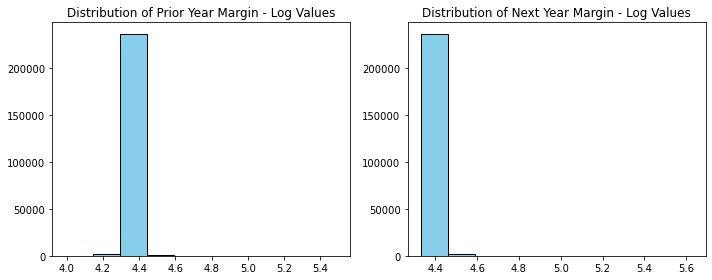

In [59]:
# Histogram of log variables for past 1 year and future year after taking log
# Create a figure and a 1x2 grid of subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

# Plotting on the first subplot
axs[0].hist(combined_all['log_margin_Y_neg_1'], bins=10, color='skyblue', edgecolor='black')
axs[0].set_title("Distribution of Prior Year Margin - Log Values")

# Plotting on the second subplot
axs[1].hist(combined_all['log_margin_Y_pos_1'], bins=10, color='skyblue', edgecolor='black')
axs[1].set_title("Distribution of Next Year Margin - Log Values")

# Adjust layout to make room for the titles and labels
plt.tight_layout()

# Show the plot
plt.show()

## Data Check Before Splitting

In [60]:
# Changing any boolean columns into int datatypes to prevent errors
boolean_columns = list(combined_all.dtypes[combined_all.dtypes == 'bool'].index)
combined_all[boolean_columns] = combined_all[boolean_columns].astype('int')

In [61]:
print("data types in training dataset are:", combined_all.dtypes.value_counts())

data types in training dataset are: float64    21
object     17
uint8      16
int64      14
dtype: int64


In [62]:
# Dropping Unnecessary Variables
combined_all = combined_all.drop(['Zip','DMA','Area_Cd','activation_date','event_date',
                            'ST','tier','tier_prev', 'Region'
                              ],axis=1)

combined_all.shape

(239356, 59)

In [63]:
categorical_vars = combined_all.select_dtypes(include=['object']).columns.drop(['acct_ID'])
print(categorical_vars)
combined_all = pd.get_dummies(combined_all, columns=categorical_vars, drop_first=True)
print(combined_all.shape)

Index(['demog_assets', 'demog_LOR', 'demog_ownrent', 'demog_age',
       'demog_inc_fine', 'demog_inc_crs', 'demog_homevalue'],
      dtype='object')
(239356, 127)


In [64]:
# Keeping only people that do not churn
x_churners_df = combined_all.query('churn_year_plus1_ind==1')
""" then we strip our the churners from the data to be used for training and testing """
x_train_df = combined_all.query('churn_year_plus1_ind==0')

x_train_df.shape

(176267, 127)

## Train Test Split

In [65]:
x_train_df, x_test_df = train_test_split(x_train_df, test_size = 0.30, random_state=42)

# will need the acct_IDs to rejoin data later, so pulling out now before dropping from actual model training data

train_acct_IDs_df = x_train_df[['acct_ID']]
test_acct_IDs_df  = x_test_df[['acct_ID']]
churners_acct_IDs_df = x_churners_df[['acct_ID']]

# the target (or dependent) variable is stored in it's own dataframe

y_train_df = x_train_df[['log_margin_Y_pos_1']]
y_test_df  = x_test_df[['log_margin_Y_pos_1']]
y_churners_df  = x_churners_df[['log_margin_Y_pos_1']]

# We want to drop acct_ID and the target variable from the dataframe of independent variables
# PLUS we want to drop the target (future timeframe) variables for churn modeling

x_train_df = x_train_df.drop(['acct_ID','churn_year_plus1_ind', 'log_margin_Y_pos_1', 'margin_Y_pos_1'
                             ],axis=1)

x_test_df = x_test_df.drop(['acct_ID','churn_year_plus1_ind', 'log_margin_Y_pos_1', 'margin_Y_pos_1'
                             ],axis=1)

x_churners_df = x_churners_df.drop(['acct_ID','churn_year_plus1_ind', 'log_margin_Y_pos_1', 'margin_Y_pos_1'
                                   ],axis=1)
x_train_df.shape

(123386, 123)

## Checking if dataset has only integer type cols

In [66]:
# # Include only integer or float columns in x_train_df for now -- Recheck after New Churn Data Available from Roe
# x_train_df = x_train_df.select_dtypes(include=['int64', 'float64'])
# x_test_df = x_test_df.select_dtypes(include=['int64', 'float64'])

In [67]:
x_train_df.dtypes.unique()

array([dtype('float64'), dtype('int64'), dtype('uint8')], dtype=object)

In [68]:
""" using the ravel simply to avoid warning in log """
y_train_array=np.ravel(y_train_df)
y_test_array=np.ravel(y_test_df)

# this line can be used to suppress any warnings caused by missing values:
np.seterr(divide='ignore', invalid='ignore')

model1_selects = SelectKBest(f_regression, k=20).fit(x_train_df, y_train_array)

x_train_selected_df = x_train_df[x_train_df.columns[model1_selects.get_support()]]
x_test_selected_df  = x_test_df[x_test_df.columns[model1_selects.get_support()]]
""" note: we are not reducing the columns in the held-out churners dataframe, because this is not our final model """

x_train_selected_df.shape

(123386, 20)

In [69]:
# Adding constant before VIF
x_train_selected_df = sm.add_constant(x_train_selected_df, has_constant='add')
x_test_selected_df  = sm.add_constant(x_test_selected_df, has_constant='add')

In [77]:
def calculate_vif_(X, thresh=10):
    cols = X.columns
    variables = np.arange(X.shape[1])
    dropped=True
    while dropped:
        dropped=False
        c = X[cols[variables]].values
        vif = [variance_inflation_factor(c, ix) for ix in np.arange(c.shape[1])]
        maxloc = vif.index(max(vif))
    if max(vif) > thresh:
        print('dropping \'' + X[cols[variables]].columns[maxloc] + '\' at index: ' + str(maxloc))
        variables = np.delete(variables, maxloc)
        dropped=True
        
        print('Remaining variables:')
        print(X.columns[variables])
    return X.iloc[:, variables]

# to drop fewer variables, and allow more multicollinearity, increase the numeric threshold here.
#    10 is a good default.  try 15 or 20 to omit fewer variables
x_train_selected_df=calculate_vif_(x_train_selected_df, 30.0)
        
x_train_selected_df.shape

dropping 'log_margin_Y_neg_1' at index: 13
Remaining variables:
Index(['margin_Y_neg_2', 'margin_Y_neg_3', 'mail_cnt_36mo', 'call_out_mo_36mo',
       'log_purch_avg_36mo', 'log_purch_cnt_life', 'tier_1-Bronze',
       'tier_5-Diamond', 'tier_prev_3-Gold', 'tier_prev_4-Platinum',
       'tier_prev_5-Diamond', 'tier_prev_xxx', 'margin_3yr_avg'],
      dtype='object')


(123386, 13)

In [78]:
""" reducing the test set to have the same columns as the training set """
""" note: we are not reducing the columns in the held-out churners dataframe, because this is not our final model """

x_test_selected_df=x_test_selected_df[x_train_selected_df.columns]

print('Remaining variables in test set:')
print(x_test_selected_df.columns)
        
x_test_selected_df.shape

Remaining variables in test set:
Index(['margin_Y_neg_2', 'margin_Y_neg_3', 'mail_cnt_36mo', 'call_out_mo_36mo',
       'log_purch_avg_36mo', 'log_purch_cnt_life', 'tier_1-Bronze',
       'tier_5-Diamond', 'tier_prev_3-Gold', 'tier_prev_4-Platinum',
       'tier_prev_5-Diamond', 'tier_prev_xxx', 'margin_3yr_avg'],
      dtype='object')


(52881, 13)

## Simple Regression To Predict Margins

 
OLS model with selected variables
 
                            OLS Regression Results                            
Dep. Variable:     log_margin_Y_pos_1   R-squared:                       0.593
Model:                            OLS   Adj. R-squared:                  0.593
Method:                 Least Squares   F-statistic:                 1.385e+04
Date:                Tue, 06 Feb 2024   Prob (F-statistic):               0.00
Time:                        22:33:36   Log-Likelihood:             3.7348e+05
No. Observations:              123386   AIC:                        -7.469e+05
Df Residuals:                  123372   BIC:                        -7.468e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------

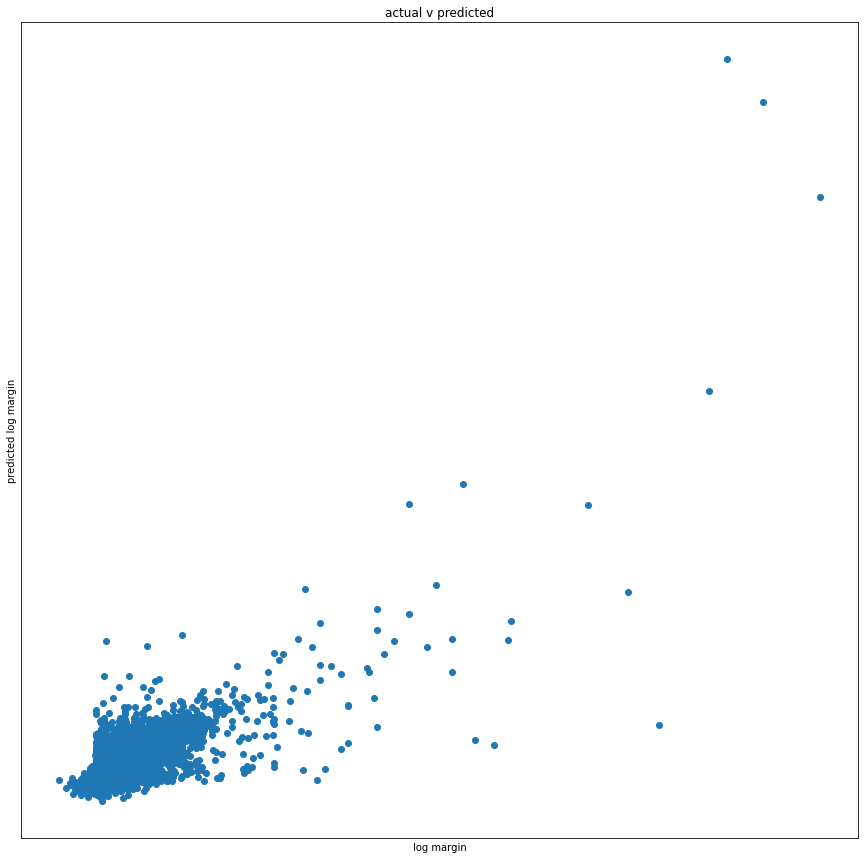

In [87]:
# Adding constant again as it was removed from the dataset previously while calculating VIF

x_train_selected_df = sm.add_constant(x_train_selected_df, has_constant='add')
x_test_selected_df  = sm.add_constant(x_test_selected_df, has_constant='add')

""" warning:  the OLS here is case-sensitive """
model = sm.OLS(y_train_df, x_train_selected_df)
result = model.fit()
print(" ") 
print("OLS model with selected variables")
print(" ") 
print(result.summary())

""" predicted values using the model """
""" using numpy copy to store result as an array """
""" manually adding a column header """
predict_train = pd.DataFrame(np.copy(result.predict(x_train_selected_df)), columns=["P_log_margin_Y_pos_1"])
predict_test = pd.DataFrame(np.copy(result.predict(x_test_selected_df)), columns=["P_log_margin_Y_pos_1"])

print(" ") 
print("MSE train:", mean_squared_error(y_train_array, predict_train))
print("MSE test:", mean_squared_error(y_test_array, predict_test))

plt.figure(figsize=(15,15))
plt.scatter(y_train_array, predict_train)
plt.xlabel("log margin")
plt.ylabel("predicted log margin")
plt.title("actual v predicted")
plt.xticks([])
plt.yticks([])
print(" ") 
plt.show()

In [151]:
# Calculate the absolute percentage errors 
y_conv = 10**y_test_array - 25000
predict_test['P_margin_Y_pos_1'] = 10**predict_test['P_log_margin_Y_pos_1'] - 25000

percentage_errors_test = 100 * np.abs((y_conv - predict_test['P_margin_Y_pos_1']) / y_conv)

# Calculate MAPE
mape_test = percentage_errors_test.mean()

# Print the log-scale MAPE
print("Test MAPE (normal scale):", mape_test)

Test MAPE (normal scale): 86895580881.02206


In [152]:
predict_test['P_margin_Y_pos_1'].describe()

count     52881.000000
mean        474.533101
std        2237.356602
min       -1507.404346
25%         104.848682
50%         269.870412
75%         563.069435
max      405233.129502
Name: P_margin_Y_pos_1, dtype: float64

In [157]:
# Calculate the absolute percentage errors 
percentage_errors_test = 100 * np.abs((y_test_array - predict_test['P_log_margin_Y_pos_1']) / y_test_array)

# Calculate MAPE
mape_test = percentage_errors_test.mean()

# Print the log-scale MAPE
print("Test MAPE (normal scale):", mape_test)

Test MAPE (normal scale): 0.10436242717914515


In [266]:
# Parameters distribution for Random Search
# param_distributions = {
#                'max_depth': [10, 20, 30, 40, None],
#                'max_features': ['auto', 'sqrt'],
#                'min_samples_leaf': [1, 2, 4, 6, 8],
#                'min_samples_split': [2, 5, 10, 15],
#                'n_estimators': [100, 50, 80, 150, 120],
#                'max_samples': [0.3, 0.5, 0.7]    
# }

# # Initialize the Random Forest Regressor
# rf = RandomForestRegressor(random_state=42)

# # Randomized Search with Cross-Validation
# random_search = RandomizedSearchCV(
#     estimator=rf,
#     param_distributions=param_distributions,
#     n_iter=5,                            
#     cv=3,                                 
#     random_state=42,
#     n_jobs=-1                             
# )

# # Fit Model
# random_search.fit(x_train_df, y_train_array)


# # Print the best parameters and the corresponding score
# print("Best parameters found: ", random_search.best_params_)
# print("Best cross-validated score: ", random_search.best_score_)

Best parameters found:  {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_samples': 0.7, 'max_features': 'sqrt', 'max_depth': 20}
Best cross-validated score:  0.6835907450474822


In [85]:
# Selecting best parameters
params_test = {'n_estimators': 120, 
               'min_samples_split': 6, 
               'min_samples_leaf': 2,
               'max_features': 'sqrt',
               'max_samples': 0.5, 
               'max_depth': 40}
final_model = RandomForestRegressor(**params_test, random_state=42)

# Training Final Model
final_model.fit(x_train_df, y_train_array)

RandomForestRegressor(max_depth=40, max_features='sqrt', max_samples=0.5,
                      min_samples_leaf=2, min_samples_split=6, n_estimators=120,
                      random_state=42)

In [86]:
# Predictions
y_train_pred = final_model.predict(x_train_df)
y_test_pred = final_model.predict(x_test_df)

# Step 5: Evaluate the final model
train_mse = mean_squared_error(y_train_array, y_train_pred)
test_mse = mean_squared_error(y_test_array, y_test_pred)
train_r2 = r2_score(y_train_array, y_train_pred)
test_r2 = r2_score(y_test_array, y_test_pred)

print("Train MSE:", train_mse)
print("Test MSE:", test_mse)
print("Train R^2:", train_r2)
print("Test R^2:", test_r2)

Train MSE: 5.8655084076588e-05
Test MSE: 0.00010133520769345285
Train R^2: 0.8266037789922975
Test R^2: 0.7212845313830913


In [106]:
# Churnerns pred
y_churners_pred = final_model.predict(x_churners_df)
y_churners_pred[0:10]

array([4.3992061 , 4.39859122, 4.40402367, 4.40397185, 4.39940189,
       4.39915418, 4.41498015, 4.39884805, 4.3991835 , 4.39926799])

In [107]:
# y_churners_pred['rf_preds'] = np.exp(y_churners_pred)

,log_margin_Y_pos_1
0,4.397792
1,4.397908
3,4.397894
5,4.397861
6,4.397845
9,4.397930
18,4.397856
19,4.397902
25,4.397909
30,4.397822


In [87]:
len(y_train_pred) + len(y_test_pred)

176267

In [251]:
# # Appending predictions of rf to original dfs
# x_train_df['rf_preds'] = np.exp(y_train_pred)
# x_test_df['rf_preds'] = np.exp(y_test_pred)

# print(x_train_df.shape)
# print(x_test_df.shape)

(123363, 81)
(52870, 81)


In [88]:
# # Manually inspecting some of the actual target values vs predictions
y_test_scaled = np.exp(y_train_array)
y_test_scaled = pd.DataFrame(y_test_scaled) 
y_test_scaled.describe()

,0
count,123386.000000
mean,81.933801
std,1.905071
min,76.114827
25%,81.434440
50%,81.588396
75%,81.912374
max,278.161894


In [89]:
# Counting number of outliers
y_outliers = y_test_scaled[y_test_scaled>100]
y_outliers.count()

0    106
dtype: int64

In [90]:
# x_train_df['rf_preds'].describe()

### RF - Feature Importance

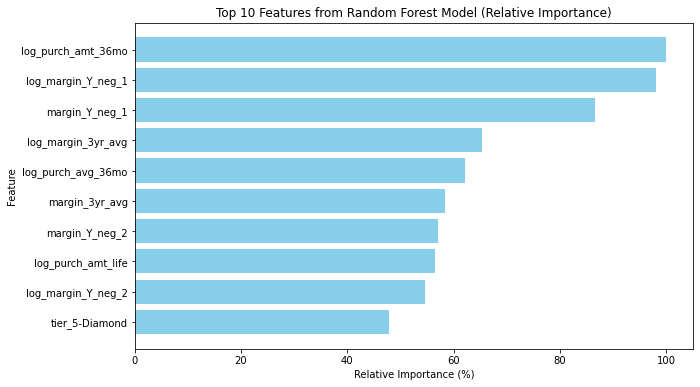

In [97]:
# Get feature importances
importances = final_model.feature_importances_
features = pd.DataFrame({
    'Feature': x_train_df.columns,
    'Importance': importances
})

features['Relative Importance'] = 100.0 * (features['Importance'] / features['Importance'].max())
features_sorted = features.sort_values(by='Relative Importance', ascending=False)

# Select the top 10 features
top_10_features = features_sorted.head(10)

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(top_10_features['Feature'], top_10_features['Relative Importance'], color='skyblue')
plt.xlabel('Relative Importance (%)')
plt.ylabel('Feature')
plt.title('Top 10 Features from Random Forest Model (Relative Importance)')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature on top
plt.show()

## LGBM Regressor

In [98]:
# Parameters distribution for Random Search for LightGBM
param_distributions = {
    'num_leaves': [15, 31, 63],  # Lower number than your current setting
    'max_depth': [-1, 15, 20, 25],  # -1 means no limit
    'min_data_in_leaf': [20, 50, 100, 200],  # Higher numbers can help with overfitting
    'learning_rate': [0.005, 0.01, 0.05],  # Smaller learning rates
    'n_estimators': [200, 400, 800],  # More estimators with a smaller learning rate
    'bagging_fraction': [0.8, 0.9, 1.0],  # Enable bagging
    'bagging_freq': [5, 7, 9],
    'feature_fraction': [0.8, 0.9, 1.0]
}

# Initialize the LightGBM Regressor
lgbm = LGBMRegressor(random_state=42)

# Randomized Search with Cross-Validation
random_search_lgbm = RandomizedSearchCV(
    estimator=lgbm,
    param_distributions=param_distributions,
    n_iter=5,  # Number of parameter settings sampled
    cv=3,      # Number of folds in cross-validation
    random_state=42,
    n_jobs=-1  # Use all available cores
)

# Fit Model
random_search_lgbm.fit(x_train_df, y_train_array)

# Print the best parameters and the corresponding score
print("Best parameters found for LGBM: ", random_search_lgbm.best_params_)
print("Best cross-validated score for LGBM: ", random_search_lgbm.best_score_)

[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Curr

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

In [99]:
# Selecting best parameters
hyper_params = {'num_leaves': 40, 
                'n_estimators': 500, 
                'min_data_in_leaf': 10, 
                'max_depth': None, 
                'learning_rate': 0.005, 
                'feature_fraction': 1.0, 
                'bagging_freq': 9, 
                'bagging_fraction': 1.0}

final_lgbm_model = LGBMRegressor(**hyper_params)

# Training Final Model
final_lgbm_model.fit(x_train_df, y_train_array)

# Predictions
y_train_lgbm_pred = final_lgbm_model.predict(x_train_df)
y_test_lgbm_pred = final_lgbm_model.predict(x_test_df)

# Evaluate the final model
train_mse_lgbm = mean_squared_error(y_train_array, y_train_lgbm_pred)
test_mse_lgbm = mean_squared_error(y_test_array, y_test_lgbm_pred)
train_r2_lgbm = r2_score(y_train_array, y_train_lgbm_pred)
test_r2_lgbm = r2_score(y_test_array, y_test_lgbm_pred)

print("Train MSE for LGBM:", train_mse_lgbm)
print("Test MSE for LGBM:", test_mse_lgbm)
print("Train R^2 for LGBM:", train_r2_lgbm)
print("Test R^2 for LGBM:", test_r2_lgbm)

[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] bagging_freq is set=9, subsample_freq=0 will be ignored. Current value: bagging_freq=9
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] bagging_freq is set=9, subsample_freq=0 will be ignored. Current 

In [302]:
# # Appending predictions of LGBM to original dfs
# x_train_df['lgbm_preds'] = y_train_lgbm_pred
# x_test_df['lgbm_preds'] = y_test_lgbm_pred

# print(x_train_df.shape)
# print(x_test_df.shape)

(123363, 82)
(52870, 82)


## Gradient Boosting Model

In [100]:
params = {'n_estimators': 70, 'min_samples_split': 2,  'max_depth': 5, 'learning_rate': 0.01, 'loss': 'squared_error'}

model7 = GradientBoostingRegressor(**params)

""" switch the order of X and Y for the fit to work with GradientBoosting """
""" also, note that we are starting with the full training data, and not the selected variables from above """
result = model7.fit(x_train_df, y_train_array)

""" returns mean accuracy"""
accuracy = model7.score(x_test_df, y_test_df)
print("GB overall accuracy, for model with all variables:", accuracy)

""" predicted values using the model """
""" using numpy copy to store result as an array """
""" manually adding a column header """
predict_train = pd.DataFrame(np.copy(model7.predict(x_train_df)), columns=["P_log_margin_Y_pos_1"])
predict_test = pd.DataFrame(np.copy(model7.predict(x_test_df)), columns=["P_log_margin_Y_pos_1"])

print(" ") 
print("MSE train, for model with all variables:", mean_squared_error(y_train_array, predict_train))
print("MSE test, for model with all variables:", mean_squared_error(y_test_array, predict_test))

GB overall accuracy, for model with all variables: 0.5318288130517002
 
MSE train, for model with all variables: 0.00014874485105691672
MSE test, for model with all variables: 0.00017021740738295773


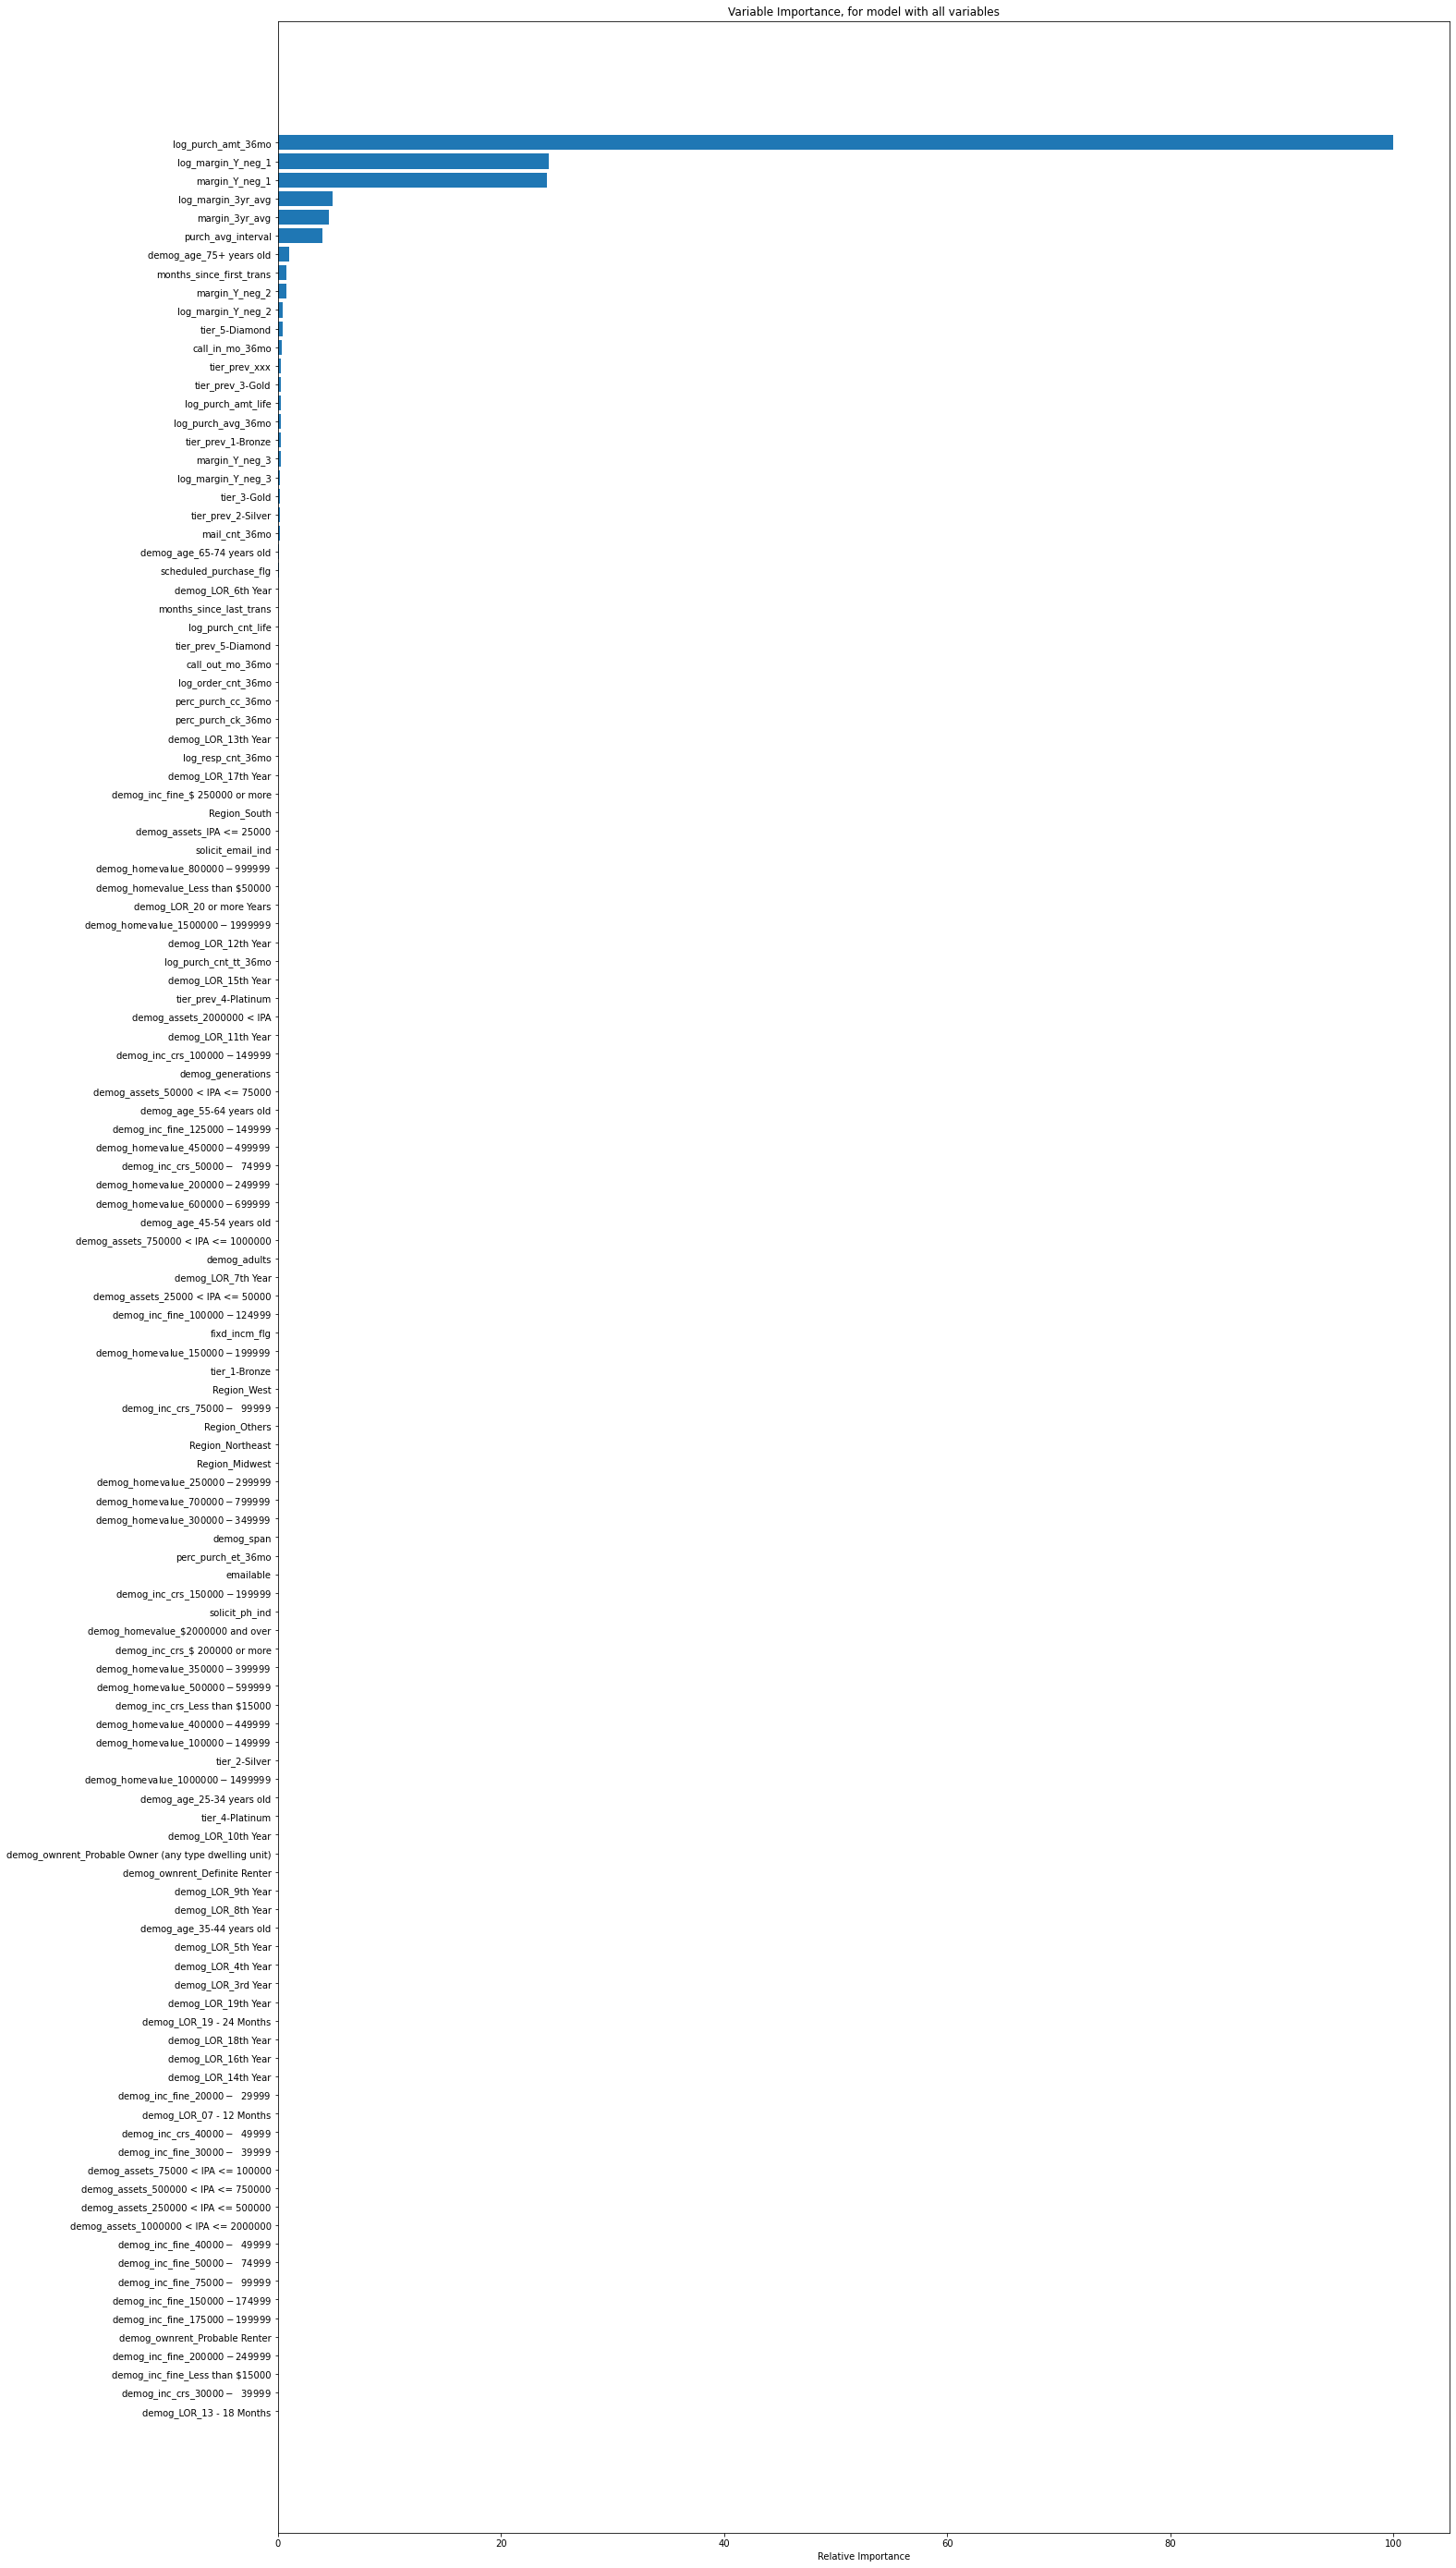

Text(0, 0.5, 'MSE')

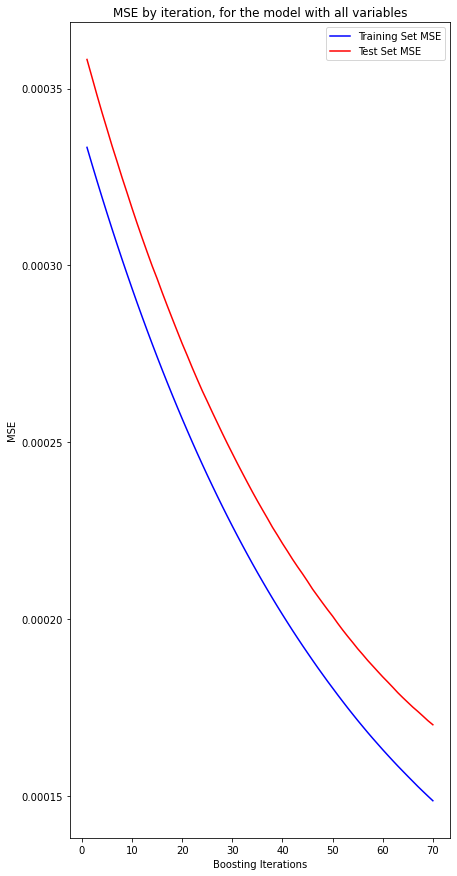

In [101]:
# Plot feature importance
feature_importance = result.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.figure(figsize=(50,50))
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, x_train_df.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance, for model with all variables')
plt.show()

""" plotting MSE with each iteration for the model with all variables """

test_MSE  = np.zeros((params['n_estimators'],), dtype=np.float64)
train_MSE = np.zeros((params['n_estimators'],), dtype=np.float64)

for i, y_pred in enumerate(model7.staged_predict(x_test_df)):
    test_MSE[i] = mean_squared_error(y_test_array, y_pred)

for i, y_pred in enumerate(model7.staged_predict(x_train_df)):
    train_MSE[i] = mean_squared_error(y_train_array, y_pred)

plt.figure(figsize=(15,15))
plt.subplot(1, 2, 1)
plt.title('MSE by iteration, for the model with all variables')
plt.plot(np.arange(params['n_estimators']) + 1, train_MSE, 'b-',
         label='Training Set MSE')
plt.plot(np.arange(params['n_estimators']) + 1, test_MSE, 'r-',
         label='Test Set MSE')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('MSE')

In [102]:

""" select only impactful features """
""" note:  decrease/increase this threshold (a relative number between 0 and 100) to select more/less features """
selected_features = (feature_importance > 10)

""" creating a dataframe of independent variables, from the training (and test) data """
"""     having only those independent variables selected above """

x_train_selected_df = x_train_df[x_train_df.columns[selected_features]]
x_test_selected_df = x_test_df[x_test_df.columns[selected_features]]

""" we are also reducing columns in churners data, as this is our final model """
"""     and any data we want to score needs to have the correct columns """
#x_churners_selected_df = x_churners_df[x_churners_df.columns[selected_features]]

""" refitting the model using a subset of features """
""" had to switch the order of X and Y for the fit to work with GradientBoosting """
result = model7.fit(x_train_selected_df, y_train_array)
""" returns mean accuracy"""
accuracy = model7.score(x_test_selected_df, y_test_df)
print("GB overall accuracy, for model with only selected features:", accuracy)

""" predicted values using the model """
""" using numpy copy to store result as an array """
""" manually adding a column header """
predict_train = pd.DataFrame(np.copy(model7.predict(x_train_selected_df)), columns=["P_log_margin_Y_pos_1"])
predict_test = pd.DataFrame(np.copy(model7.predict(x_test_selected_df)), columns=["P_log_margin_Y_pos_1"])
#predict_churners = pd.DataFrame(np.copy(model7.predict(x_churners_selected_df)), columns=["P_log_margin_Y_pos_1"])

print(" ") 
print("MSE train, for model with only selected features:", mean_squared_error(y_train_array, predict_train))
print("MSE test, for model with only selected features:", mean_squared_error(y_test_array, predict_test))

GB overall accuracy, for model with only selected features: 0.5312259079171526
 
MSE train, for model with only selected features: 0.0001552096498398542
MSE test, for model with only selected features: 0.0001704366112805096


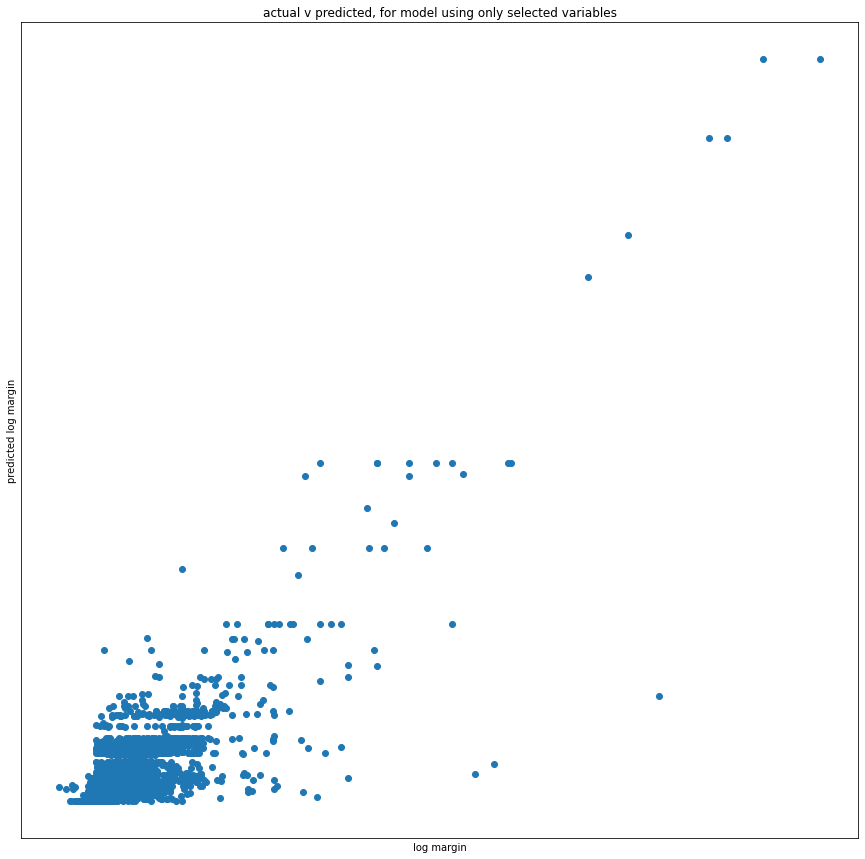

Text(0, 0.5, 'MSE')

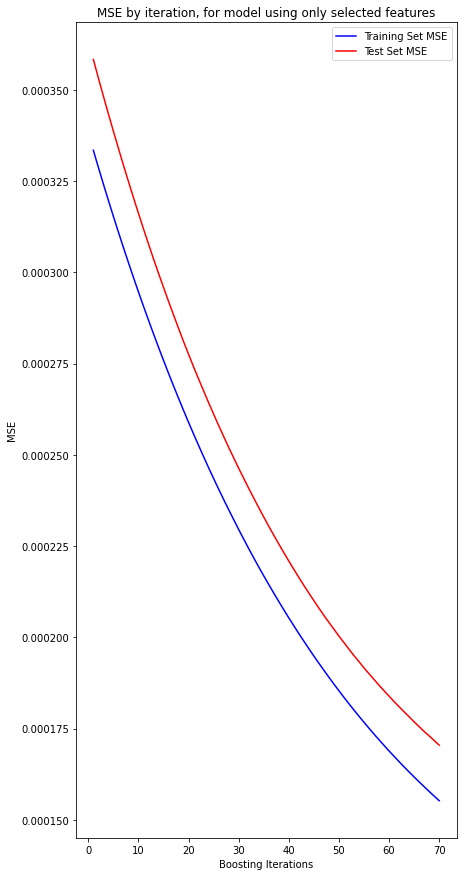

In [103]:
plt.figure(figsize=(15,15))
plt.scatter(y_train_array, predict_train)
plt.xlabel("log margin")
plt.ylabel("predicted log margin")
plt.title("actual v predicted, for model using only selected variables")
plt.xticks([])
plt.yticks([])
print(" ") 
plt.show()

""" plotting MSE with each iteration """

test_MSE  = np.zeros((params['n_estimators'],), dtype=np.float64)
train_MSE = np.zeros((params['n_estimators'],), dtype=np.float64)

for i, y_pred in enumerate(model7.staged_predict(x_test_selected_df)):
    test_MSE[i] = mean_squared_error(y_test_array, y_pred)

for i, y_pred in enumerate(model7.staged_predict(x_train_selected_df)):
    train_MSE[i] = mean_squared_error(y_train_array, y_pred)

plt.figure(figsize=(15,15))
plt.subplot(1, 2, 1)
plt.title('MSE by iteration, for model using only selected features')
plt.plot(np.arange(params['n_estimators']) + 1, train_MSE, 'b-',
         label='Training Set MSE')
plt.plot(np.arange(params['n_estimators']) + 1, test_MSE, 'r-',
         label='Test Set MSE')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('MSE')

## Concatenating Files 

In [121]:
""" append together train and test predicted values, keeping only acct ID and predicted values """
""" also predicting values for the held-out churners and appending those, so we have all rows """
predict_train = pd.DataFrame(np.copy(y_train_pred), columns=["P_log_margin_Y_pos_1"])
predict_test = pd.DataFrame(np.copy(y_test_pred), columns=["P_log_margin_Y_pos_1"])
predict_churners = pd.DataFrame(np.copy(y_churners_pred), columns=["P_log_margin_Y_pos_1"])
""" note that the index for the predicted values vector """
""" is reset, and thus complicates a join back with the original """
""" thus, reset the index on the original data, then join with predicted """
""" WARNING: you have to do the same, to join back with dataframe of regressors """
y_train_df = y_train_df.reset_index(drop=True)
y_test_df = y_test_df.reset_index(drop=True)
y_churners_df = y_churners_df.reset_index(drop=True)

""" joining predicted and actuals """
""" NOTE:  for reference, for now...to be used more later to create complete """
"""     dataframe with all obs and inputs and outputs """

train_accounts = train_acct_IDs_df.reset_index(drop=True)
pred_v_actual_train = y_train_df.join(predict_train)
pred_v_actual_train = pred_v_actual_train.join(train_accounts)

test_accounts = test_acct_IDs_df.reset_index(drop=True)
pred_v_actual_test = y_test_df.join(predict_test)
pred_v_actual_test = pred_v_actual_test.join(test_accounts)

churners_accounts = churners_acct_IDs_df.reset_index(drop=True)
pred_v_actual_churners = y_churners_df.join(predict_churners)
pred_v_actual_churners = pred_v_actual_churners.join(churners_accounts)

""" appending test to train, and calling it train """
pred_v_actual_train = pd.concat([pred_v_actual_train, pred_v_actual_test], ignore_index=True)

""" appending churners to train, and calling it train """
pred_v_actual_train = pd.concat([pred_v_actual_train, pred_v_actual_churners], ignore_index=True)

""" dropping the actuals and keeping just the predicted values """
pred_v_actual_train = pred_v_actual_train.drop(['log_margin_Y_pos_1'
                             ],axis=1)

""" and then save predicted values by acct ID to csv """

' and then save predicted values by acct ID to csv '

In [124]:
# Checking dataset
cleaned_data = combined_all.copy()
cleaned_data = cleaned_data.merge(pred_v_actual_train, how='inner', on='acct_ID')
print(cleaned_data.shape)


(239356, 128)


In [127]:
cleaned_data['P_margin_Y_pos_1'] = np.exp(cleaned_data['log_margin_Y_pos_1']) 

In [128]:
cleaned_data['P_margin_Y_pos_1'].head(10)

0    81.271250
1    81.280613
2    81.761890
3    81.279554
4    81.431919
5    81.276814
6    81.275529
7    81.574062
8    81.574905
9    81.282420
Name: P_margin_Y_pos_1, dtype: float64

In [129]:
# Change path in below code
cleaned_data.to_csv('margin_scores_final.csv',index=False)

In [131]:
cleaned_data['log_margin_Y_pos_1'].describe()

count    239356.000000
mean          4.403607
std           0.016353
min           4.332243
25%           4.397902
50%           4.400707
75%           4.403681
max           5.628203
Name: log_margin_Y_pos_1, dtype: float64

In [ ]:
cleaned_data[]